## Import libraries and dataset

**The first step is to import the necessary libraries** 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import mlxtend as ml
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
%matplotlib inline

**Next, we import the dataset and take a look at the first few columns**

In [2]:
df = pd.read_csv('employee_attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,30,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1,1479,...,3.0,80,2,4.0,2,2,2,1,2.0,2
1,52,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,1,813,...,2.0,80,1,9.0,3,3,5,2,1.0,4
2,42,No,Travel_Rarely,462,Sales,14.0,2,Medical,1,936,...,1.0,80,0,10.0,6,3,5,4,0.0,3
3,55,No,Non-Travel,177,Research & Development,8.0,1,Medical,1,1278,...,4.0,80,1,34.0,3,3,33,9,15.0,0
4,35,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1,1529,...,4.0,80,0,11.0,3,1,11,8,3.0,3


In [4]:
df.shape

(1176, 35)

**Next, we run decriptive statistics**

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1174.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000,...,1175.000000,1176.0,1176.000000,1174.000000,1176.000000,1176.000000,1176.000000,1176.000000,1175.000000,1176.000000
mean,36.960034,800.386905,9.495741,2.895408,1.0,1036.430272,2.704932,65.822279,2.740646,2.068936,...,2.718298,80.0,0.795918,11.402896,2.809524,2.747449,6.918367,4.151361,2.125106,4.242347
std,9.071964,404.709216,10.251379,1.025685,0.0,600.681874,1.094128,20.292035,0.719277,1.109590,...,1.084095,0.0,0.847033,8.368864,1.307697,0.691586,6.107140,3.501618,3.183567,7.210390
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,461.750000,2.000000,2.000000,1.0,499.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.000000,7.000000,3.000000,1.0,1032.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,1574.500000,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,224.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,114.000000,6.000000,4.000000,40.000000,18.000000,15.000000,219.000000


**We can see from the stats above that the standard deviation of some fields is zero**

In [6]:
df.describe().loc['std'][df.describe().loc['std'] == 0]

EmployeeCount    0.0
StandardHours    0.0
Name: std, dtype: float64

**Let's explore this further**

In [7]:
print(df['EmployeeCount'].value_counts())
print(df['StandardHours'].value_counts())

1    1176
Name: EmployeeCount, dtype: int64
80    1176
Name: StandardHours, dtype: int64


**Since these attributes have no variance, they can be removed**

In [8]:
df.drop(['EmployeeCount','StandardHours'],axis = 1,inplace = True)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**Now, let's explore the data futher**

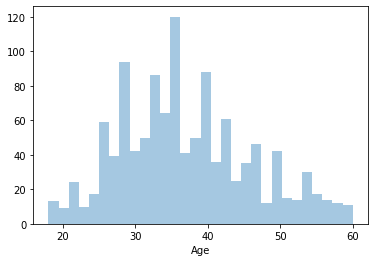

In [10]:
sns.distplot(df['Age'],kde = False,bins = 30)

**Age appears to be a continuous variable, it needs to be discretized**

In [11]:
print(df['Age'].min())
print(df['Age'].max())

18
60


In [12]:
df['Age'] = pd.cut(df['Age'],bins = [17,35,50,70],labels = ['Young Adult','Middle Aged','Elderly'])

In [13]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Young Adult,No,Travel_Rarely,1358,Sales,16.0,1,Life Sciences,1479,4,...,3.0,3.0,2,4.0,2,2,2,1,2.0,2
1,Elderly,No,Travel_Rarely,1325,Research & Development,11.0,4,Life Sciences,813,4,...,4.0,2.0,1,9.0,3,3,5,2,1.0,4
2,Middle Aged,No,Travel_Rarely,462,Sales,14.0,2,Medical,936,3,...,3.0,1.0,0,10.0,6,3,5,4,0.0,3
3,Elderly,No,Non-Travel,177,Research & Development,8.0,1,Medical,1278,4,...,3.0,4.0,1,34.0,3,3,33,9,15.0,0
4,Young Adult,No,Travel_Rarely,1029,Research & Development,16.0,3,Life Sciences,1529,4,...,3.0,4.0,0,11.0,3,1,11,8,3.0,3


**Let's check for N/A's**

In [14]:
df.isna().sum()[df.isna().sum() > 0]

DistanceFromHome            2
Gender                      1
JobLevel                    1
OverTime                    1
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    1
TotalWorkingYears           2
YearsSinceLastPromotion     1
dtype: int64

**Let's visualize some of these attributes**

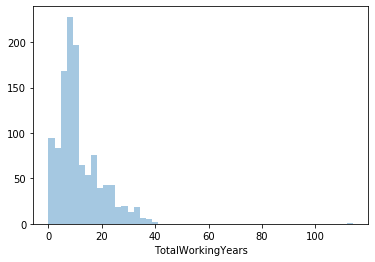

In [15]:
sns.distplot(df['TotalWorkingYears'].dropna(),kde = False)

**The NA can be replaced with the median**

In [16]:
df[df['TotalWorkingYears'].isna()].index

Int64Index([82, 968], dtype='int64')

In [17]:
rownum = [82, 968]

for num in rownum:
    df.at[num,'TotalWorkingYears'] = df['TotalWorkingYears'].median()

**Let's check if it worked**

In [18]:
df[df['TotalWorkingYears'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**From the above visualization, there appears to be an outlier**

In [19]:
df[df['TotalWorkingYears'] > 70]['TotalWorkingYears']

143    114.0
Name: TotalWorkingYears, dtype: float64

**The outlier will be incorporated into the highest bin during descretization**

In [20]:
labels = ['Low','Intermediate','High','Very High']

In [21]:
df['TotalWorkingYears'] = pd.qcut(df['TotalWorkingYears'],q = 4,labels = labels)

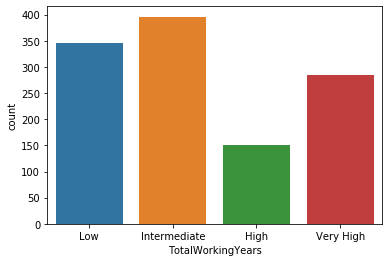

In [22]:
sns.countplot(x = 'TotalWorkingYears',data = df)

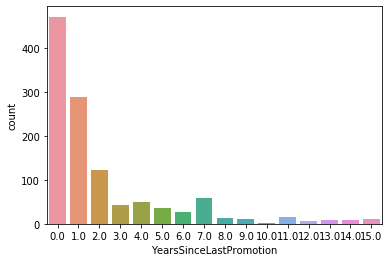

In [23]:
sns.countplot(x = 'YearsSinceLastPromotion',data = df)

**The NA can be replaced with the median**

In [24]:
rownum = df[df['YearsSinceLastPromotion'].isna()].index[0]

df.at[rownum,'YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].median()

**Let's check if it worked**

In [25]:
df[df['YearsSinceLastPromotion'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now for gender**

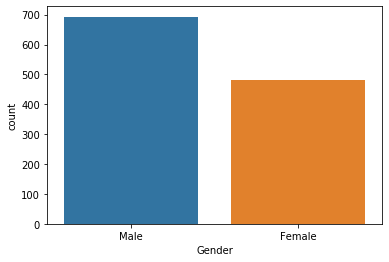

In [26]:
sns.countplot(x = 'Gender',data = df)

In [27]:
rownum = df[df['Gender'].isna()].index[0]

df.at[rownum,'Gender'] = df['Gender'].mode()
df[df['Gender'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now for Job Level**

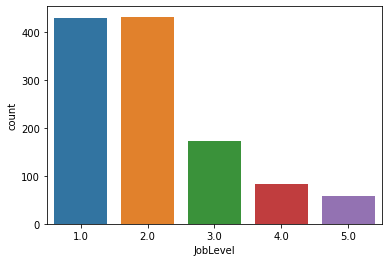

In [28]:
sns.countplot(x = "JobLevel",data = df)

In [29]:
rownum = df[df['JobLevel'].isna()].index[0]

df.at[rownum,'JobLevel'] = df['JobLevel'].median()
df[df['JobLevel'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now for Over Time**

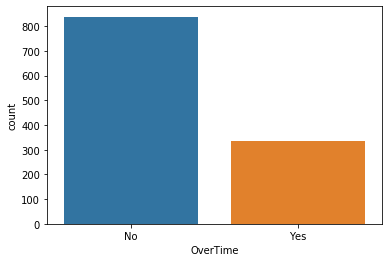

In [30]:
sns.countplot(x = "OverTime",data = df)

In [31]:
rownum = df[df['OverTime'].isna()].index[0]

df.at[rownum,'OverTime'] = df['OverTime'].mode()
df[df['OverTime'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now for Percent Salary Hike**

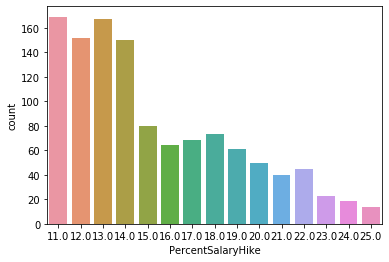

In [32]:
sns.countplot(x = 'PercentSalaryHike',data = df)

In [33]:
rownum = df[df['PercentSalaryHike'].isna()].index[0]

df.at[rownum,'PercentSalaryHike'] = df['PercentSalaryHike'].median()
df[df['PercentSalaryHike'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now for Performance Rating**

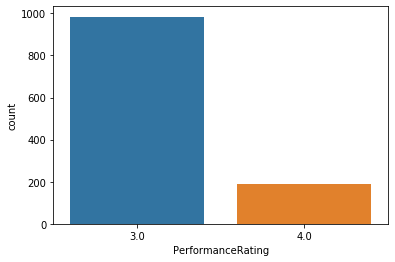

In [34]:
sns.countplot(x = 'PerformanceRating',data = df)

In [35]:
rownum = df[df['PerformanceRating'].isna()].index[0]

df.at[rownum,'PerformanceRating'] = df['PerformanceRating'].mode()
df[df['PerformanceRating'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now Relationship Satisfaction**

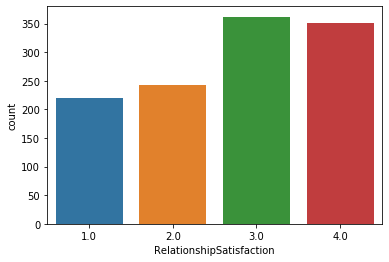

In [36]:
sns.countplot(x = 'RelationshipSatisfaction',data = df)

In [37]:
rownum = df[df['RelationshipSatisfaction'].isna()].index[0]

df.at[rownum,'RelationshipSatisfaction'] = df['RelationshipSatisfaction'].mode()
df[df['RelationshipSatisfaction'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


**Now for Distance From Home**

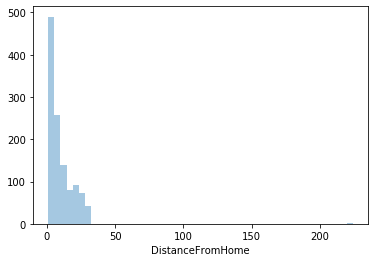

In [38]:
sns.distplot(df['DistanceFromHome'].dropna(),kde = False)

**We can deal with the NA's through interpolation**

In [39]:
df['DistanceFromHome'].interpolate(inplace = True)
df['DistanceFromHome'].isna().value_counts()

False    1176
Name: DistanceFromHome, dtype: int64

**The outlier's will be handled by discretization**

In [40]:
df['DistanceFromHome'] = pd.qcut(df['DistanceFromHome'],q = 4,labels = labels)

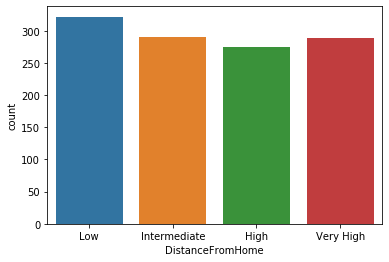

In [41]:
sns.countplot(x = 'DistanceFromHome',data = df)

In [44]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

**Now that there are no more NA's, let's explore the remaining fields**

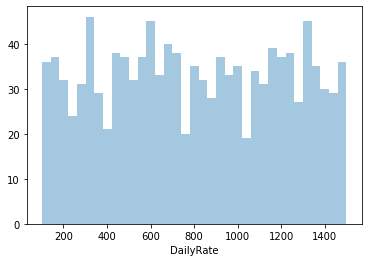

In [42]:
sns.distplot(df['DailyRate'],kde = False,bins = 35)

**This field has to be discretized**

In [43]:
print(df['DailyRate'].min())
print(df['DailyRate'].max())

102
1499


In [21]:
df['DailyRate'] = pd.qcut(df['DailyRate'],4,labels = labels)

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Young Adult,No,Travel_Rarely,Very High,Sales,16.0,1,Life Sciences,1,1479,...,3.0,80,2,4.0,2,2,2,1,2.0,2
1,Elderly,No,Travel_Rarely,Very High,Research & Development,11.0,4,Life Sciences,1,813,...,2.0,80,1,9.0,3,3,5,2,1.0,4
2,Middle Aged,No,Travel_Rarely,Intermediate,Sales,14.0,2,Medical,1,936,...,1.0,80,0,10.0,6,3,5,4,0.0,3
3,Elderly,No,Non-Travel,Low,Research & Development,8.0,1,Medical,1,1278,...,4.0,80,1,34.0,3,3,33,9,15.0,0
4,Young Adult,No,Travel_Rarely,High,Research & Development,16.0,3,Life Sciences,1,1529,...,4.0,80,0,11.0,3,1,11,8,3.0,3


In [48]:
df['EmployeeNumber'].nunique()

1176

**The employee number field is a unique identifier. It doesn't help us identify causes of attrition. Therefore it can be removed**

In [49]:
df.drop(['EmployeeNumber'],axis = 1,inplace = True)

In [50]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

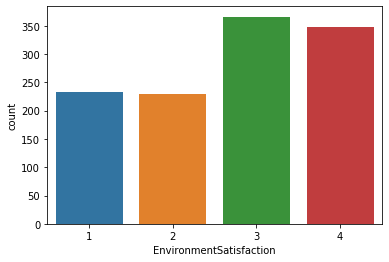

In [52]:
sns.countplot(x = 'EnvironmentSatisfaction',data = df)

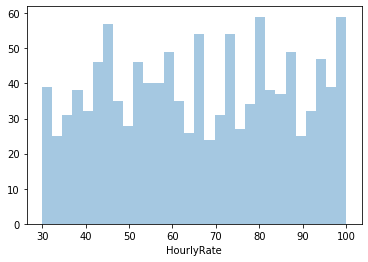

In [53]:
sns.distplot(df['HourlyRate'],kde = False,bins = 30)

In [54]:
df['HourlyRate'] = pd.qcut(df['HourlyRate'],4,labels = labels)

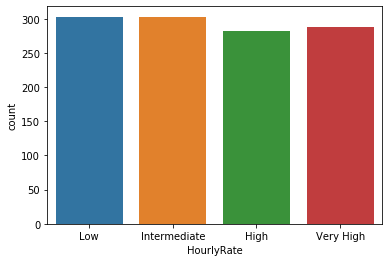

In [58]:
sns.countplot(x = 'HourlyRate',data = df)

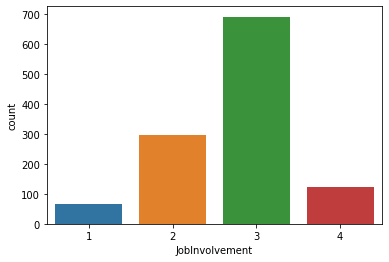

In [59]:
sns.countplot(x = 'JobInvolvement',data = df)

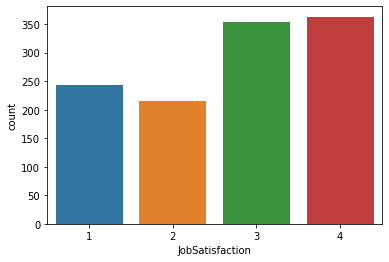

In [60]:
sns.countplot(x = "JobSatisfaction",data = df)

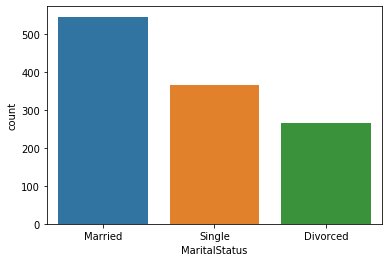

In [61]:
sns.countplot(x = "MaritalStatus",data = df)

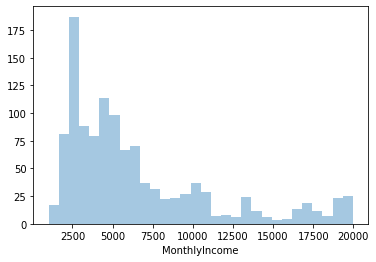

In [62]:
sns.distplot(df["MonthlyIncome"],kde = False,bins = 30)

In [63]:
print(df['MonthlyIncome'].min())
print(df['MonthlyIncome'].max())

1009
19973


In [64]:
df["MonthlyIncome"] = pd.qcut(df["MonthlyIncome"],q = 4,labels = labels)

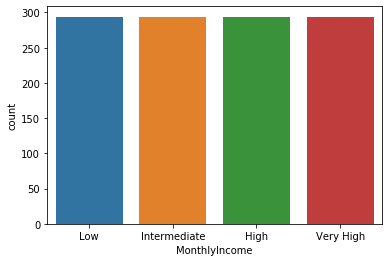

In [65]:
sns.countplot('MonthlyIncome',data = df)

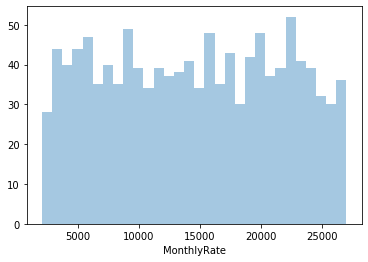

In [66]:
sns.distplot(df["MonthlyRate"],kde = False,bins = 30)

In [67]:
df["MonthlyRate"] = pd.qcut(df["MonthlyRate"],q = 4,labels = labels)

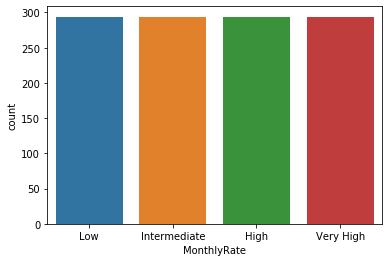

In [68]:
sns.countplot('MonthlyRate',data = df)

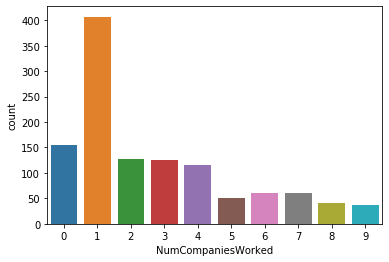

In [69]:
sns.countplot('NumCompaniesWorked',data = df)

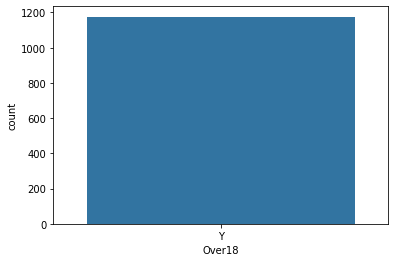

In [71]:
sns.countplot(x = 'Over18',data = df)

In [70]:
df['Over18'].value_counts()

Y    1176
Name: Over18, dtype: int64

In [72]:
df.drop(['Over18'],axis = 1,inplace = True)

In [73]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

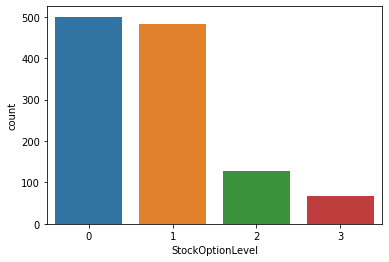

In [74]:
sns.countplot(x = 'StockOptionLevel',data = df)

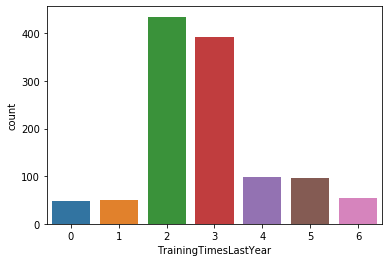

In [75]:
sns.countplot(x = 'TrainingTimesLastYear',data = df)

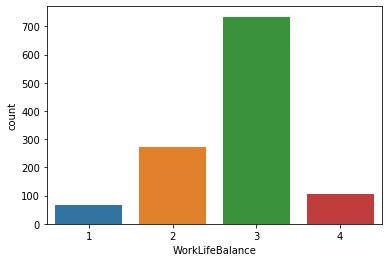

In [76]:
sns.countplot(x = 'WorkLifeBalance',data = df)

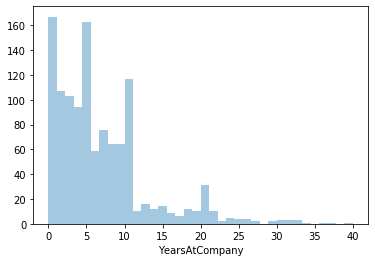

In [77]:
sns.distplot(df['YearsAtCompany'],kde = False)

In [78]:
df['YearsAtCompany'] = pd.qcut(df['YearsAtCompany'],q = 4,labels = labels)

In [79]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Young Adult,No,Travel_Rarely,1358,Sales,Very High,1,Life Sciences,4,Male,...,3.0,3.0,2,Low,2,2,Low,1,2.0,2
1,Elderly,No,Travel_Rarely,1325,Research & Development,High,4,Life Sciences,4,Female,...,4.0,2.0,1,Intermediate,3,3,Intermediate,2,1.0,4
2,Middle Aged,No,Travel_Rarely,462,Sales,High,2,Medical,3,Female,...,3.0,1.0,0,Intermediate,6,3,Intermediate,4,0.0,3
3,Elderly,No,Non-Travel,177,Research & Development,High,1,Medical,4,Male,...,3.0,4.0,1,Very High,3,3,Very High,9,15.0,0
4,Young Adult,No,Travel_Rarely,1029,Research & Development,Very High,3,Life Sciences,4,Female,...,3.0,4.0,0,High,3,1,Very High,8,3.0,3


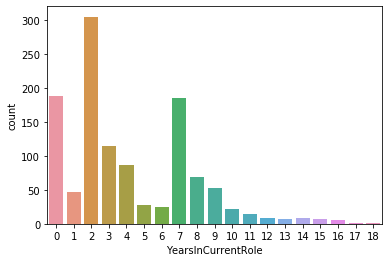

In [80]:
sns.countplot(df['YearsInCurrentRole'],data = df)

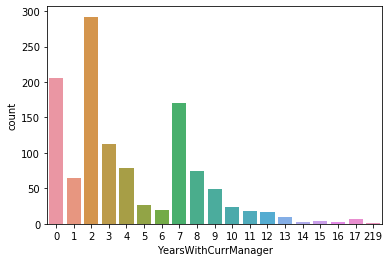

In [81]:
sns.countplot(df['YearsWithCurrManager'],data = df)

In [82]:
df['YearsWithCurrManager'].value_counts()

2      292
0      206
7      170
3      113
4       78
8       75
1       64
9       49
5       26
10      23
6       20
11      18
12      16
13       9
17       7
15       4
14       3
16       2
219      1
Name: YearsWithCurrManager, dtype: int64

In [83]:
df['YearsWithCurrManager'] = pd.qcut(df['YearsWithCurrManager'],q = 4,labels = labels)

In [90]:
df['YearsWithCurrManager'].head()

0             Low
1            High
2    Intermediate
3             Low
4    Intermediate
Name: YearsWithCurrManager, dtype: category
Categories (4, object): [Low < Intermediate < High < Very High]

## Preparing the data for the model

In [97]:
# convert dataframe to string
df = df.astype('str')

In [98]:
# Strip whitespaces
df[df.columns] = df.apply(lambda x: x.str.strip())

In [99]:
#Convert to type object
df = df.astype('object')

In [100]:
#Create a dataframe consisting of column names
df1 = pd.DataFrame({col: str(col)+'=' for col in df}, index=df)

In [101]:
# Concatenate column names from df1 to the values in df
for col in df.columns:
    df1[col] = df1[col].str.cat(df[col],sep =" ")

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: A future version of pandas will perform index alignment when `others` is a Series/Index/DataFrame (or a list-like containing one). To disable alignment (the behavior before v.0.23) and silence this warning, use `.values` on any Series/Index/DataFrame in `others`. To enable alignment and silence this warning, pass `join='left'|'outer'|'inner'|'right'`. The future default will be `join='left'`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
"(Young Adult, No, Travel_Rarely, 1358, Sales, Very High, 1, Life Sciences, 4, Male, Very High, 3, 2.0, Sales Executive, 3, Married, High, Low, 8, No, 15.0, 3.0, 3.0, 2, Low, 2, 2, Low, 1, 2.0, Low)",Age= Young Adult,Attrition= No,BusinessTravel= Travel_Rarely,DailyRate= 1358,Department= Sales,DistanceFromHome= Very High,Education= 1,EducationField= Life Sciences,EnvironmentSatisfaction= 4,Gender= Male,...,PerformanceRating= 3.0,RelationshipSatisfaction= 3.0,StockOptionLevel= 2,TotalWorkingYears= Low,TrainingTimesLastYear= 2,WorkLifeBalance= 2,YearsAtCompany= Low,YearsInCurrentRole= 1,YearsSinceLastPromotion= 2.0,YearsWithCurrManager= Low
"(Elderly, No, Travel_Rarely, 1325, Research & Development, High, 4, Life Sciences, 4, Female, High, 3, 2.0, Laboratory Technician, 3, Married, Intermediate, Very High, 8, No, 20.0, 4.0, 2.0, 1, Intermediate, 3, 3, Intermediate, 2, 1.0, High)",Age= Elderly,Attrition= No,BusinessTravel= Travel_Rarely,DailyRate= 1325,Department= Research & Development,DistanceFromHome= High,Education= 4,EducationField= Life Sciences,EnvironmentSatisfaction= 4,Gender= Female,...,PerformanceRating= 4.0,RelationshipSatisfaction= 2.0,StockOptionLevel= 1,TotalWorkingYears= Intermediate,TrainingTimesLastYear= 3,WorkLifeBalance= 3,YearsAtCompany= Intermediate,YearsInCurrentRole= 2,YearsSinceLastPromotion= 1.0,YearsWithCurrManager= High
"(Middle Aged, No, Travel_Rarely, 462, Sales, High, 2, Medical, 3, Female, High, 2, 2.0, Sales Executive, 3, Single, High, Low, 7, No, 17.0, 3.0, 1.0, 0, Intermediate, 6, 3, Intermediate, 4, 0.0, Intermediate)",Age= Middle Aged,Attrition= No,BusinessTravel= Travel_Rarely,DailyRate= 462,Department= Sales,DistanceFromHome= High,Education= 2,EducationField= Medical,EnvironmentSatisfaction= 3,Gender= Female,...,PerformanceRating= 3.0,RelationshipSatisfaction= 1.0,StockOptionLevel= 0,TotalWorkingYears= Intermediate,TrainingTimesLastYear= 6,WorkLifeBalance= 3,YearsAtCompany= Intermediate,YearsInCurrentRole= 4,YearsSinceLastPromotion= 0.0,YearsWithCurrManager= Intermediate
"(Elderly, No, Non-Travel, 177, Research & Development, High, 1, Medical, 4, Male, Low, 2, 4.0, Healthcare Representative, 2, Divorced, Very High, Very High, 1, Yes, 15.0, 3.0, 4.0, 1, Very High, 3, 3, Very High, 9, 15.0, Low)",Age= Elderly,Attrition= No,BusinessTravel= Non-Travel,DailyRate= 177,Department= Research & Development,DistanceFromHome= High,Education= 1,EducationField= Medical,EnvironmentSatisfaction= 4,Gender= Male,...,PerformanceRating= 3.0,RelationshipSatisfaction= 4.0,StockOptionLevel= 1,TotalWorkingYears= Very High,TrainingTimesLastYear= 3,WorkLifeBalance= 3,YearsAtCompany= Very High,YearsInCurrentRole= 9,YearsSinceLastPromotion= 15.0,YearsWithCurrManager= Low
"(Young Adult, No, Travel_Rarely, 1029, Research & Development, Very High, 3, Life Sciences, 4, Female, Very High, 2, 3.0, Healthcare Representative, 2, Single, Very High, Very High, 1, No, 19.0, 3.0, 4.0, 0, High, 3, 1, Very High, 8, 3.0, Intermediate)",Age= Young Adult,Attrition= No,BusinessTravel= Travel_Rarely,DailyRate= 1029,Department= Research & Development,DistanceFromHome= Very High,Education= 3,EducationField= Life Sciences,EnvironmentSatisfaction= 4,Gender= Female,...,PerformanceRating= 3.0,RelationshipSatisfaction= 4.0,StockOptionLevel= 0,TotalWorkingYears= High,TrainingTimesLastYear= 3,WorkLifeBalance= 1,YearsAtCompany= Very High,YearsInCurrentRole= 8,YearsSinceLastPromotion= 3.0,YearsWithCurrManager= Intermediate


In [103]:
# Create a list out of the dataframe
records = []
for i in range(0,len(df1)):
    records.append([str(df1.values[i,j]) 
    for j in range(0, len(df1.columns))])

In [104]:
#initialize transaction encoder
te = TransactionEncoder()

In [105]:
# Transform records
te_ary = te.fit(records).transform(records)

In [106]:
#convert the transformed records to a dataframe
df2 = pd.DataFrame(te_ary, columns=te.columns_)

In [107]:
df2.head()

,Age= Elderly,Age= Middle Aged,Age= Young Adult,Attrition= No,Attrition= Yes,BusinessTravel= Non-Travel,BusinessTravel= Travel_Frequently,BusinessTravel= Travel_Rarely,DailyRate= 1001,DailyRate= 1002,...,YearsSinceLastPromotion= 4.0,YearsSinceLastPromotion= 5.0,YearsSinceLastPromotion= 6.0,YearsSinceLastPromotion= 7.0,YearsSinceLastPromotion= 8.0,YearsSinceLastPromotion= 9.0,YearsWithCurrManager= High,YearsWithCurrManager= Intermediate,YearsWithCurrManager= Low,YearsWithCurrManager= Very High
0,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,True,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,True,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


## Run Association Rules With Default Hyperparameters

In [109]:
# Create frequent itemsets using apriori
frequent_itemsets = apriori(df2,use_colnames=True)

In [110]:
frequent_itemsets.sort_values(by='support',ascending=False).head(10)

,support,itemsets
0,0.842687,(Attrition= No)
6,0.837585,(PerformanceRating= 3.0)
1,0.713435,(BusinessTravel= Travel_Rarely)
5,0.712585,(OverTime= No)
12,0.709184,"(PerformanceRating= 3.0, Attrition= No)"
2,0.649660,(Department= Research & Development)
11,0.635204,"(OverTime= No, Attrition= No)"
7,0.624150,(WorkLifeBalance= 3)
8,0.612245,"(BusinessTravel= Travel_Rarely, Attrition= No)"
15,0.602891,"(BusinessTravel= Travel_Rarely, PerformanceRat..."


In [113]:
#Create Association Rules
rules = association_rules(frequent_itemsets)

**The top values of the basic model can be seen below**

In [114]:
rules.sort_values(by = 'lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(OverTime= No),(Attrition= No),0.712585,0.842687,0.635204,0.891408,1.057816,0.034718,1.448662
13,"(OverTime= No, PerformanceRating= 3.0)",(Attrition= No),0.596088,0.842687,0.530612,0.890157,1.056332,0.028296,1.432161
1,(Department= Research & Development),(Attrition= No),0.649660,0.842687,0.567177,0.873037,1.036015,0.019717,1.239042
6,(WorkLifeBalance= 3),(Attrition= No),0.624150,0.842687,0.537415,0.861035,1.021774,0.011452,1.132036
11,"(BusinessTravel= Travel_Rarely, PerformanceRat...",(Attrition= No),0.602891,0.842687,0.518707,0.860367,1.020980,0.010659,1.126615
0,(BusinessTravel= Travel_Rarely),(Attrition= No),0.713435,0.842687,0.612245,0.858164,1.018367,0.011042,1.109122
2,(JobInvolvement= 3),(Attrition= No),0.586735,0.842687,0.503401,0.857971,1.018137,0.008968,1.107611
12,"(BusinessTravel= Travel_Rarely, Attrition= No)",(PerformanceRating= 3.0),0.612245,0.837585,0.518707,0.847222,1.011506,0.005900,1.063080
7,(BusinessTravel= Travel_Rarely),(PerformanceRating= 3.0),0.713435,0.837585,0.602891,0.845054,1.008917,0.005328,1.048201
4,(PerformanceRating= 3.0),(Attrition= No),0.837585,0.842687,0.709184,0.846701,1.004763,0.003362,1.026180


In [115]:
rules.shape

(15, 9)

In [116]:
# Function to set consequents and run association rules
def SupervisedApriori(data,consequent,min_supp,min_conf,min_lift):
    frequent_itemsets = apriori(data, min_supp, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf)
    #filter according to lift
    rules = rules[rules['lift'] > min_lift]
    sup_rules = pd.DataFrame()
    for i in consequent:
        df = rules[rules['consequents'] == {i}]
        sup_rules = sup_rules.append(df,ignore_index = True)
    return(sup_rules)

In [117]:
SupervisedApriori(df2,consequent = ['Attrition= No','Attrition= Yes'],
min_supp=0.4, min_conf=0.7, min_lift=1).sort_values(by='support',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(PerformanceRating= 3.0),(Attrition= No),0.837585,0.842687,0.709184,0.846701,1.004763,0.003362,1.026180
4,(OverTime= No),(Attrition= No),0.712585,0.842687,0.635204,0.891408,1.057816,0.034718,1.448662
0,(BusinessTravel= Travel_Rarely),(Attrition= No),0.713435,0.842687,0.612245,0.858164,1.018367,0.011042,1.109122
1,(Department= Research & Development),(Attrition= No),0.649660,0.842687,0.567177,0.873037,1.036015,0.019717,1.239042
6,(WorkLifeBalance= 3),(Attrition= No),0.624150,0.842687,0.537415,0.861035,1.021774,0.011452,1.132036


## Association Rules where 'Attrition = No'

In [118]:
attrition_no = SupervisedApriori(df2,consequent = ['Attrition= No'],
min_supp=0.3, min_conf=0.9, min_lift=1)

**The below rules are the 5 most interesting because they have the highest lift(values >1). We can see that employees who don't work over time,work in research and development, have a high performance rating,don't have to travel often for business etc. They're highly likely to stay with the company. These rules go along with our intuitive understanding of factors that would cause employees to stay, for example, employees who do not work too many hours would naturally prefer to stay.**

In [119]:
attrition_no.sort_values(by='lift',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,"(BusinessTravel= Travel_Rarely, OverTime= No, ...",(Attrition= No),0.337585,0.842687,0.309524,0.916877,1.088039,0.025045,1.892522
11,"(OverTime= No, Department= Research & Developm...",(Attrition= No),0.379252,0.842687,0.346939,0.914798,1.085573,0.027348,1.846357
12,"(OverTime= No, JobInvolvement= 3, PerformanceR...",(Attrition= No),0.346939,0.842687,0.316327,0.911765,1.081973,0.023966,1.782880
4,"(OverTime= No, Department= Research & Developm...",(Attrition= No),0.462585,0.842687,0.421769,0.911765,1.081973,0.031954,1.782880
6,"(OverTime= No, MaritalStatus= Married)",(Attrition= No),0.335034,0.842687,0.305272,0.911168,1.081264,0.022943,1.770894


In [127]:
attrition_yes = SupervisedApriori(df2,consequent = ['Attrition= Yes'],
min_supp=0.04, min_conf=0.4, min_lift=1)

**The below rules are the 5 most interesting because they have high lift values. Employees who have to work overtime,have low incomes/stock options,are in the early stages of their careers etc. Have a higher chance of leaving the company. This also goes along with our inituitive understanding, employees that spend long hours at work and aren't compensated highly are likely to look for opportunities elsewhere**

In [128]:
attrition_yes.sort_values(by='lift',ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,"(JobLevel= 1.0, OverTime= Yes, MonthlyIncome= ...",(Attrition= Yes),0.072279,0.157313,0.042517,0.588235,3.739269,0.031147,2.046526
3,"(OverTime= Yes, MonthlyIncome= Low)",(Attrition= Yes),0.075680,0.157313,0.042517,0.561798,3.571212,0.030612,1.923055
33,"(TotalWorkingYears= Low, StockOptionLevel= 0, ...",(Attrition= Yes),0.082483,0.157313,0.041667,0.505155,3.211145,0.028691,1.702930
46,"(YearsAtCompany= Low, Age= Young Adult, StockO...",(Attrition= Yes),0.082483,0.157313,0.041667,0.505155,3.211145,0.028691,1.702930
1,"(JobLevel= 1.0, OverTime= Yes)",(Attrition= Yes),0.102041,0.157313,0.049320,0.483333,3.072432,0.033267,1.631007


## Link to The Dashboard

https://hw01pranavradhakrishna.herokuapp.com/